In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def nb_train(matrix, category):
    state = {}
    M = matrix.shape[1]
    ###################
    spam = matrix[category == 1, :]
    nospam = matrix[category == 0, :]
    
    spam_num_words = spam.sum(axis = 1)
    nospam_num_words = nospam.sum(axis = 1)

    state['mu_spam'] = (spam.sum(axis = 0) + 1) / (np.sum(spam_num_words) + M)
    state['mu_nospam'] = (nospam.sum(axis = 0) + 1) / (np.sum(nospam_num_words) + M)
    state['phi'] = spam.shape[0]/(spam.shape[0]+nospam.shape[0])
    ###################
    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])
    ###################
    Data_LL_spam = np.matmul(matrix, np.log(state['mu_spam']))
    Data_LL_nospam = np.matmul(matrix, np.log(state['mu_nospam']))
    phi = state['phi']
  
    output[Data_LL_spam + np.log(phi) > Data_LL_nospam + np.log(1-phi)] = 1
    ###################
    return output

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    
    return error

## Part (a)

[12 points] The test error when training on the full training set is 1.625%. A different error means that the implemented is probably a wrong Naive
Bayes Model.

In [3]:
# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('q4_data/MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('q4_data/MATRIX.TEST')
tokenlist = np.array(tokenlist)

# Train
state = nb_train(dataMatrix_train, category_train)

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
evaluate(prediction, category_test)

Error: 1.6250%


0.01625

## Part (b)

    The five most indicative words for the spam class are: httpaddr, spam, unsubscrib, ebai, and valet.

In [4]:
likely_spam_tokens = np.argsort(state['mu_spam']/state['mu_nospam'])[-5:]
print(tokenlist[likely_spam_tokens][::-1])

['httpaddr' 'spam' 'unsubscrib' 'ebai' 'valet']


## Part (c)

[Total 9 points] 

In [5]:
train_sizes = np.array([50, 100, 200, 400, 800, 1400])
errors = np.ones(train_sizes.shape)
for i, train_size in enumerate(train_sizes):
    dataMatrix_train, tokenlist, category_train = readMatrix('q4_data/MATRIX.TRAIN.'+str(train_size))
    state = nb_train(dataMatrix_train, category_train)
    prediction = nb_test(dataMatrix_test, state)
    errors[i] = evaluate(prediction, category_test)

Error: 3.8750%
Error: 2.6250%
Error: 2.6250%
Error: 1.8750%
Error: 1.7500%
Error: 1.6250%


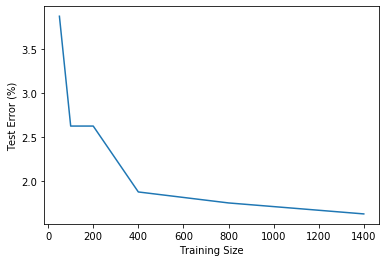

In [6]:
plt.plot(train_sizes,errors*100);
plt.xlabel('Training Size');
plt.ylabel('Test Error (%)');